In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from collections import Counter
from IPython.display import display, HTML
sns.set_style('darkgrid')

# DATASET

In [13]:
dataset = pd.read_csv('winequality-red.csv')
data = pd.read_csv('winequality.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# DATA VISUALIZATION AND PRE-PROCESSING

In [14]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
bins = (2, 6.5, 8)
labels = ['bad', 'good']
dataset['quality'] = pd.cut(x = dataset['quality'], bins = bins, labels = labels)

In [16]:
dataset['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
dataset['quality'] = labelencoder_y.fit_transform(dataset['quality'])

In [18]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


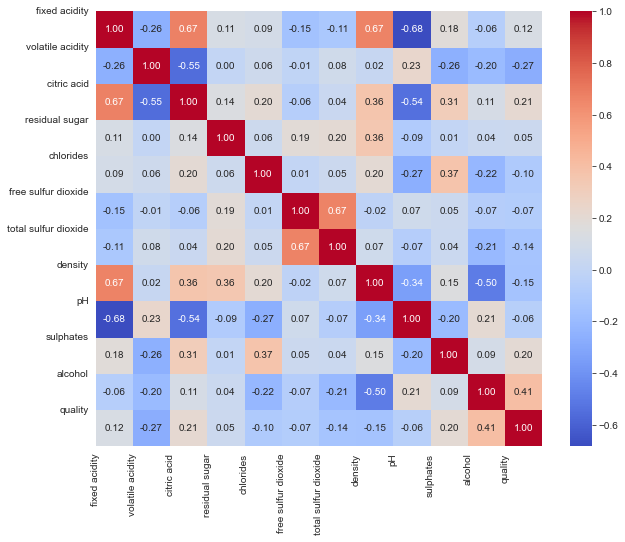

In [59]:
corr = dataset.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()


# EXPLORATORY DATA ANALYSIS

C:\Users\gowth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Quality')

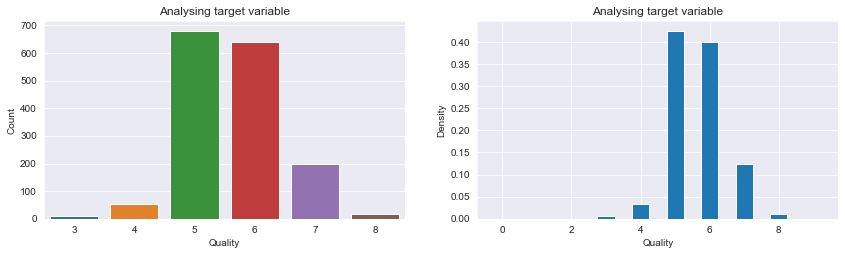

In [21]:
fig = plt.figure(figsize=(22,8)) 
plt.subplot2grid((2,3),(0,0))
sns.countplot(data['quality'])
plt.title("Analysing target variable"); plt.ylabel("Count"); plt.xlabel("Quality")

plt.subplot2grid((2,3),(0,1))
data['quality'].hist(bins=np.arange(11)-0.5, rwidth=0.5, density=True)
plt.title("Analysing target variable"); plt.ylabel("Density"); plt.xlabel("Quality")

C:\Users\gowth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gowth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Analysing target variable')

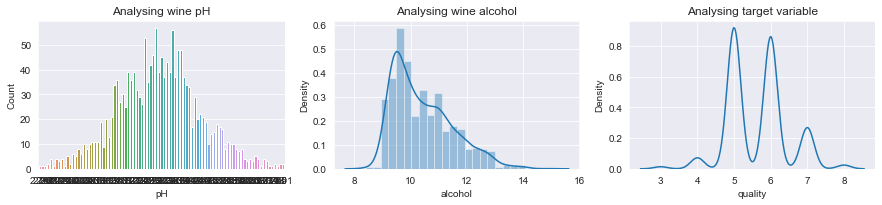

In [22]:
fig = plt.figure(figsize=(15,6)) 
plt.subplot2grid((2,3),(0,0))
sns.countplot(data['pH'])
plt.title("Analysing wine pH"); plt.ylabel("Count"); plt.xlabel("pH")

plt.subplot2grid((2,3),(0,1))
sns.distplot(data['alcohol'])
plt.title("Analysing wine alcohol"); plt.ylabel("Density"); plt.xlabel("alcohol")

plt.subplot2grid((2,3),(0,2))
sns.kdeplot(data.query('quality > 2').quality)
plt.title("Analysing target variable")

Text(0.5, 0.98, 'Relationship between continuous variables')

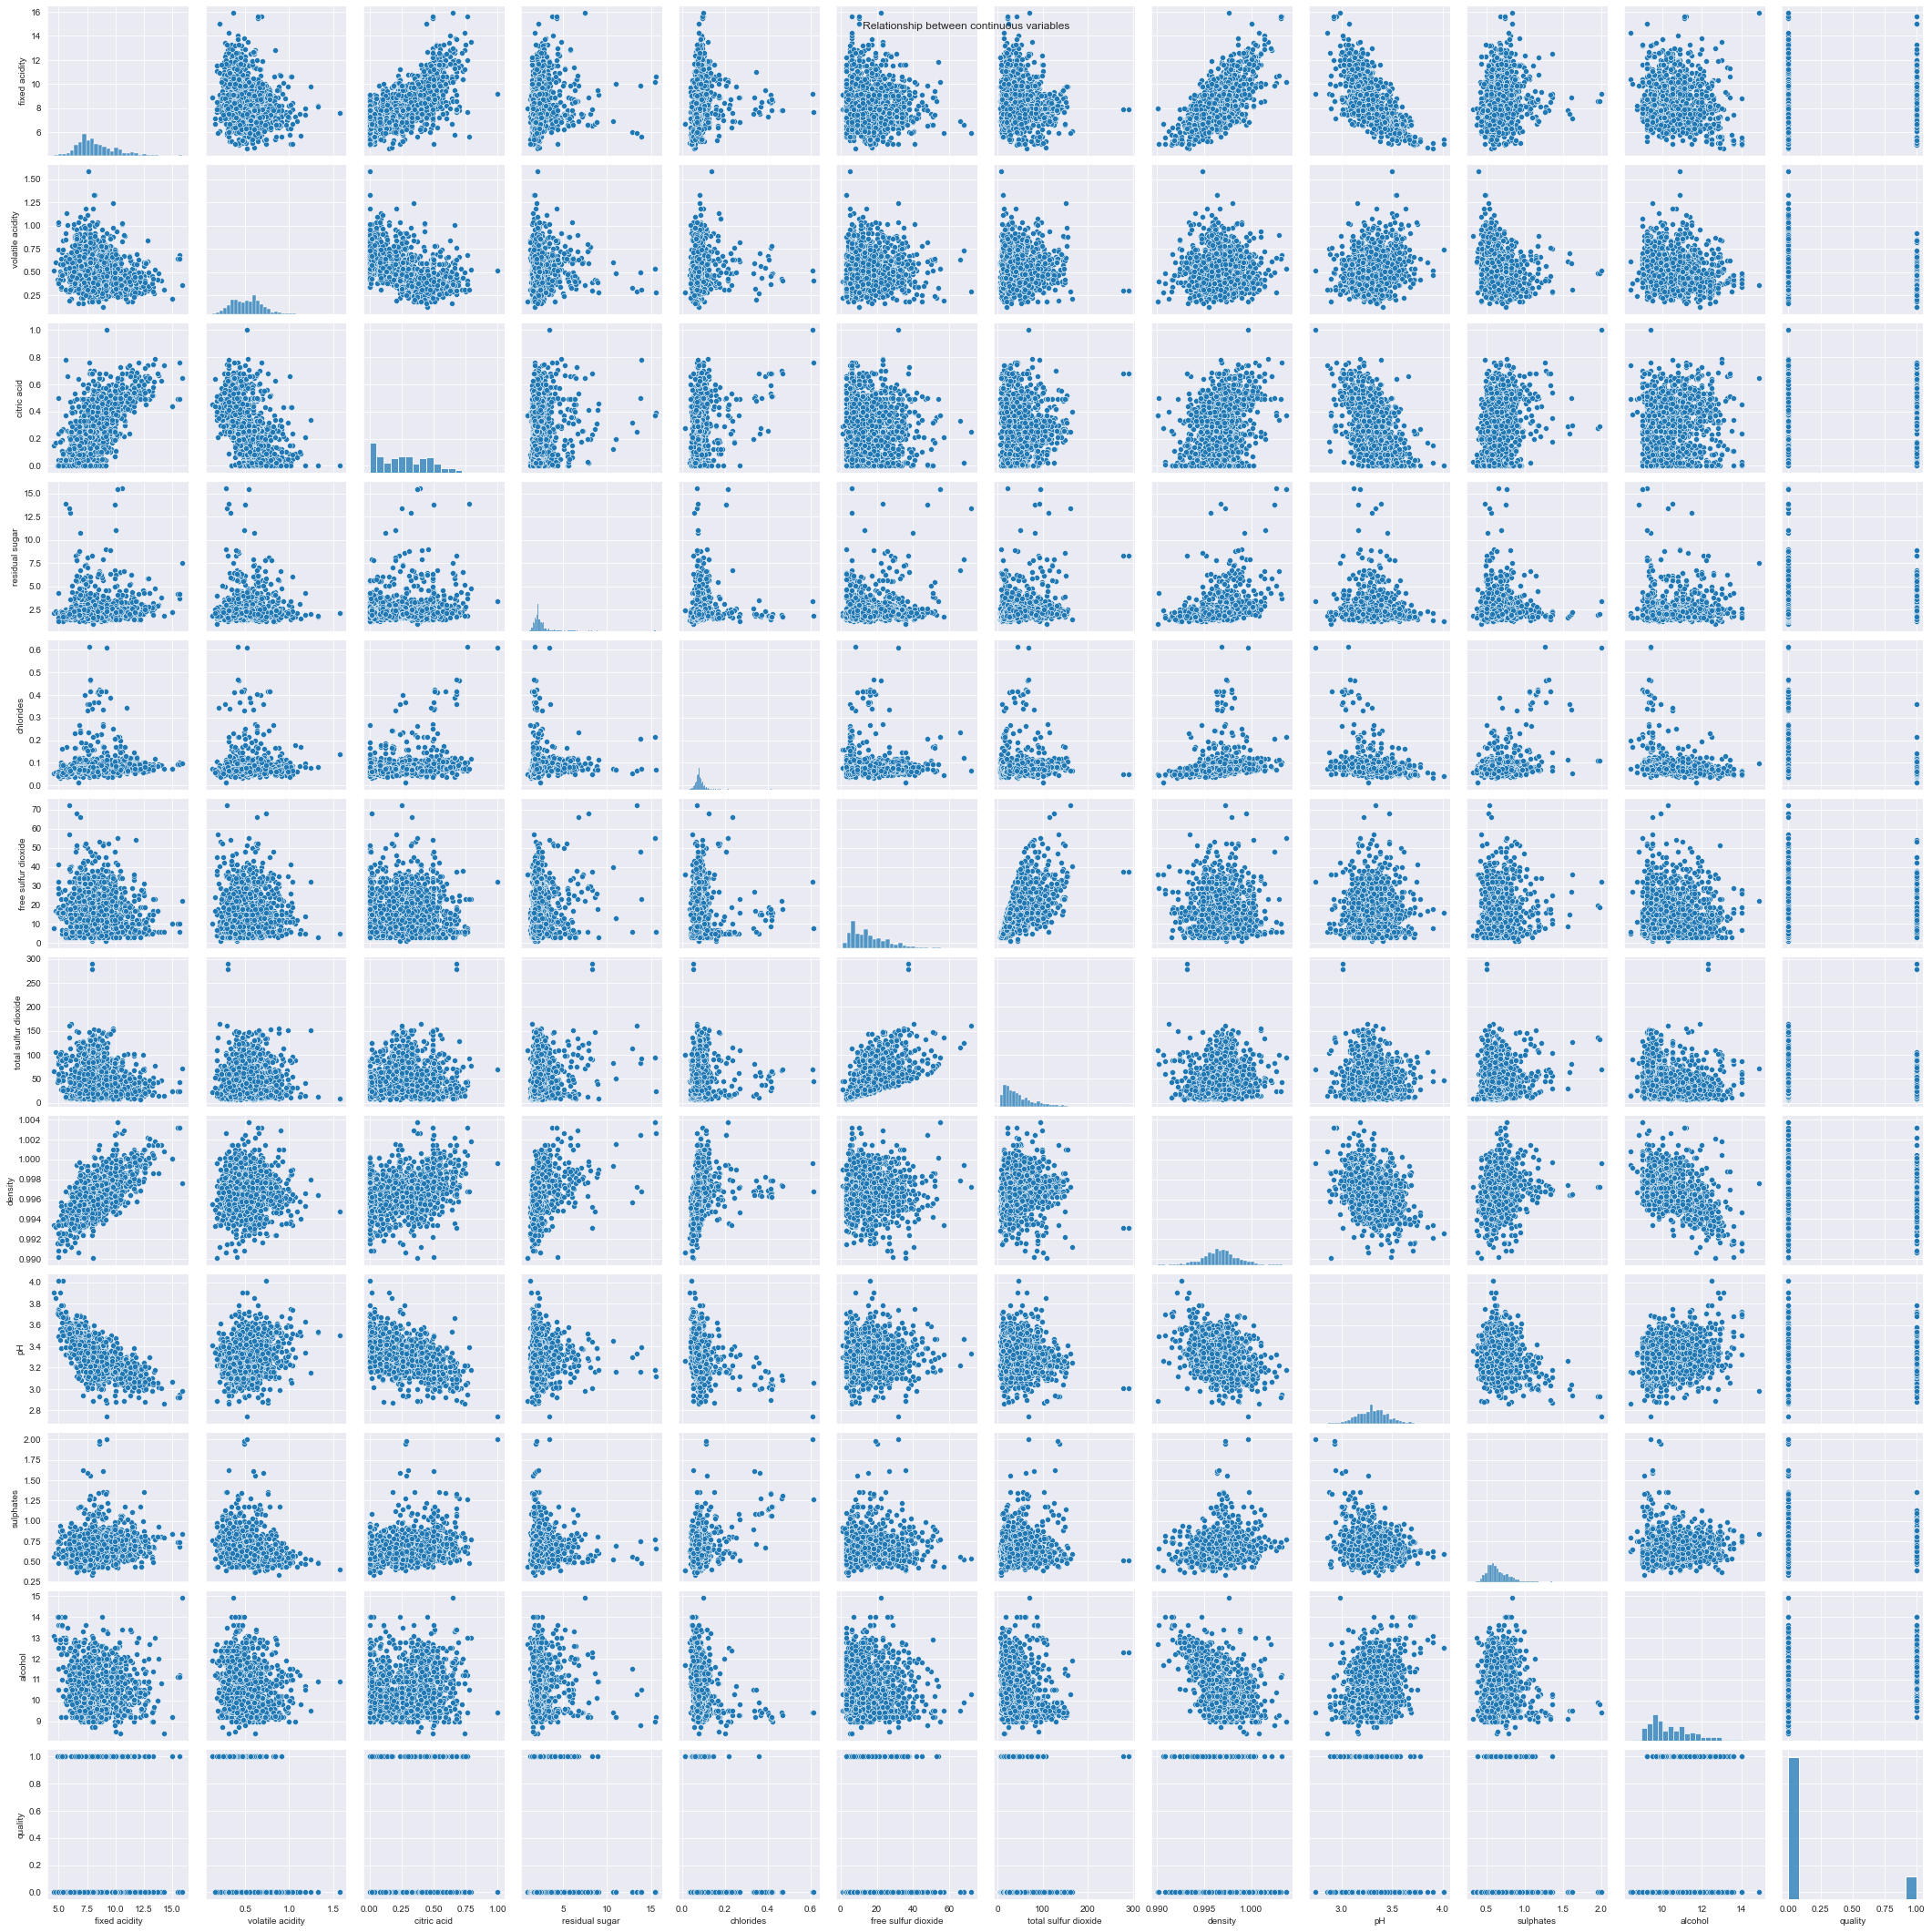

In [115]:
dataset.columns
sns.pairplot(dataset)
plt.suptitle('Relationship between continuous variables')

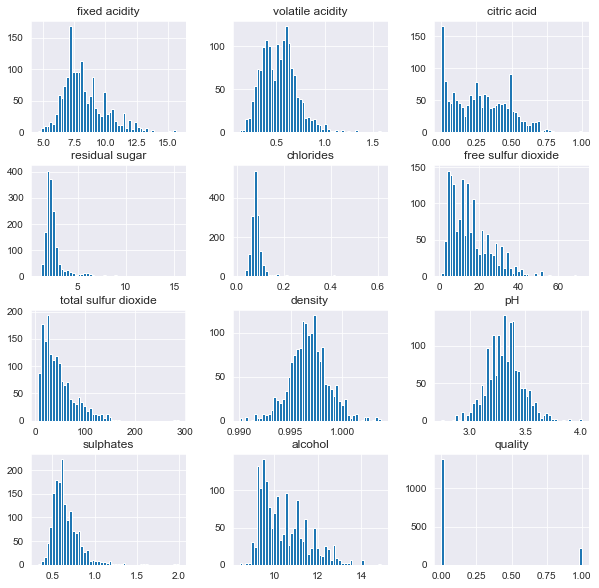

In [116]:
dataset.hist(figsize=(10,10),bins=50)
plt.show()

<AxesSubplot:title={'center':'Correlation with Quality with respect to attributes'}>

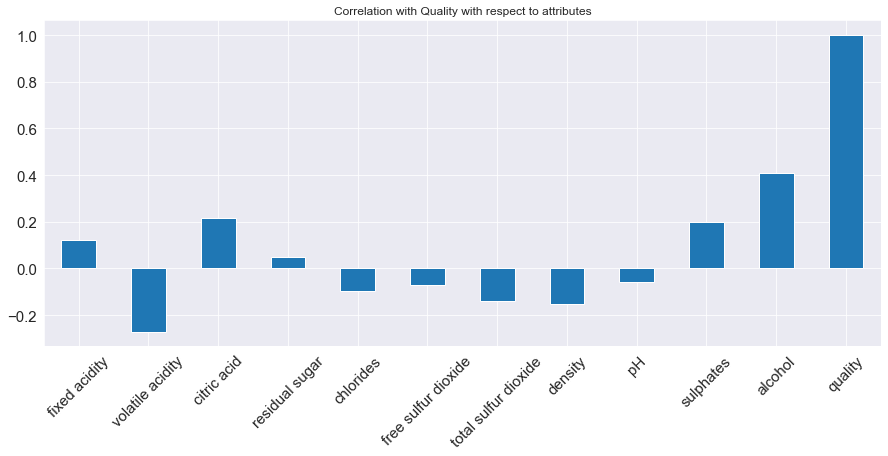

In [117]:
dataset.corrwith(dataset.quality).plot.bar(figsize = (15, 6), title = "Correlation with Quality with respect to attributes", fontsize = 15, rot = 45, grid = True)

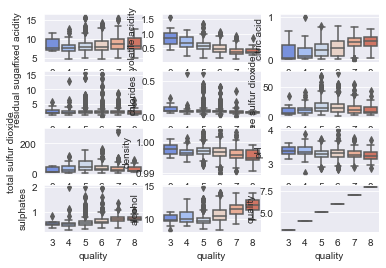

In [119]:
#box plots
cols = dataset.columns
cnt = 1
for col in cols :
 plt.subplot(4,3,cnt)
 sns.boxplot(x="quality",y=col,data=data,palette="coolwarm")
 cnt = cnt + 1
plt.show()

In [23]:
X = dataset.drop('quality', axis = 1).values
y = dataset['quality'].values.reshape(-1,1)

In [74]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [75]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1279, 11)
Shape of X_test:  (320, 11)
Shape of y_train:  (1279, 1)
Shape of y_test (320, 1)


# CLASSIFICATION MODELS

In [76]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# LOGISTIC REGRESSION

In [77]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(C=1, fit_intercept=True, max_iter=1000, penalty = 'l2', solver='liblinear')
classifier_lr.fit(X_train_scaled, y_train.ravel())

LogisticRegression(C=1, max_iter=1000, solver='liblinear')

In [78]:
# Predicting Cross Validation Score
cv_lr = cross_val_score(estimator = classifier_lr, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_lr.mean())

y_pred_lr_train = classifier_lr.predict(X_train_scaled)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_lr_train)

y_pred_lr_test = classifier_lr.predict(X_test_scaled)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_lr_test)

CV:  0.885857529527559
Training set:  0.8858483189992181
Test set:  0.865625


In [105]:
print(classification_report(y_test,y_pred_lr_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320



In [79]:
confusion_matrix(y_test, y_pred_lr_test)

array([[264,   9],
       [ 34,  13]], dtype=int64)

In [80]:
tp_lr = confusion_matrix(y_test, y_pred_lr_test)[0,0]
fp_lr = confusion_matrix(y_test, y_pred_lr_test)[0,1]
tn_lr = confusion_matrix(y_test, y_pred_lr_test)[1,1]
fn_lr = confusion_matrix(y_test, y_pred_lr_test)[1,0]

# KNN

In [81]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(leaf_size = 1, metric = 'minkowski', n_neighbors = 32, weights = 'distance')
classifier_knn.fit(X_train_scaled, y_train.ravel())

KNeighborsClassifier(leaf_size=1, n_neighbors=32, weights='distance')

In [82]:
# Predicting Cross Validation Score
cv_knn = cross_val_score(estimator = classifier_knn, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_knn.mean())

y_pred_knn_train = classifier_knn.predict(X_train_scaled)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test_scaled)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)

CV:  0.9022699311023622
Training set:  1.0
Test set:  0.89375


In [106]:
print(classification_report(y_test,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       273
           1       0.71      0.47      0.56        47

    accuracy                           0.89       320
   macro avg       0.81      0.72      0.75       320
weighted avg       0.88      0.89      0.88       320



In [83]:
confusion_matrix(y_test, y_pred_knn_test)

array([[264,   9],
       [ 25,  22]], dtype=int64)

In [84]:
tp_knn = confusion_matrix(y_test, y_pred_knn_test)[0,0]
fp_knn = confusion_matrix(y_test, y_pred_knn_test)[0,1]
tn_knn = confusion_matrix(y_test, y_pred_knn_test)[1,1]
fn_knn = confusion_matrix(y_test, y_pred_knn_test)[1,0]

# NAIVE BAYES

In [85]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train_scaled, y_train.ravel())

GaussianNB()

In [86]:
# Predicting Cross Validation Score
cv_nb = cross_val_score(estimator = classifier_nb, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_nb.mean())

y_pred_nb_train = classifier_nb.predict(X_train_scaled)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test_scaled)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

CV:  0.8373462106299213
Training set:  0.8389366692728695
Test set:  0.846875


In [107]:
print(classification_report(y_test,y_pred_nb_test))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       273
           1       0.49      0.79      0.60        47

    accuracy                           0.85       320
   macro avg       0.72      0.82      0.75       320
weighted avg       0.89      0.85      0.86       320



In [87]:
confusion_matrix(y_test, y_pred_nb_test)

array([[234,  39],
       [ 10,  37]], dtype=int64)

In [88]:
tp_nb = confusion_matrix(y_test, y_pred_nb_test)[0,0]
fp_nb = confusion_matrix(y_test, y_pred_nb_test)[0,1]
tn_nb = confusion_matrix(y_test, y_pred_nb_test)[1,1]
fn_nb = confusion_matrix(y_test, y_pred_nb_test)[1,0]

# DECISION TREE CLASSIFICATION

In [89]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'gini', max_features=6, max_leaf_nodes=400, random_state = 33)
classifier_dt.fit(X_train_scaled, y_train.ravel())

DecisionTreeClassifier(max_features=6, max_leaf_nodes=400, random_state=33)

In [90]:
# Predicting Cross Validation Score
cv_dt = cross_val_score(estimator = classifier_dt, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_dt.mean())

y_pred_dt_train = classifier_dt.predict(X_train_scaled)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test_scaled)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

CV:  0.8960014763779528
Training set:  1.0
Test set:  0.878125


In [108]:
print(classification_report(y_test,y_pred_dt_test))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       273
           1       0.58      0.62      0.60        47

    accuracy                           0.88       320
   macro avg       0.76      0.77      0.76       320
weighted avg       0.88      0.88      0.88       320



In [91]:
confusion_matrix(y_test, y_pred_dt_test)

array([[252,  21],
       [ 18,  29]], dtype=int64)

In [92]:
tp_dt = confusion_matrix(y_test, y_pred_dt_test)[0,0]
fp_dt = confusion_matrix(y_test, y_pred_dt_test)[0,1]
tn_dt = confusion_matrix(y_test, y_pred_dt_test)[1,1]
fn_dt = confusion_matrix(y_test, y_pred_dt_test)[1,0]

# RANDOM FOREST CLASSIFIER

In [93]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(criterion = 'entropy', max_features = 4, n_estimators = 800, random_state=33)
classifier_rf.fit(X_train_scaled, y_train.ravel())

RandomForestClassifier(criterion='entropy', max_features=4, n_estimators=800,
                       random_state=33)

In [94]:
# Predicting Cross Validation Score
cv_rf = cross_val_score(estimator = classifier_rf, X = X_train_scaled, y = y_train.ravel(), cv = 10)
print("CV: ", cv_rf.mean())

y_pred_rf_train = classifier_rf.predict(X_train_scaled)
accuracy_rf_train = accuracy_score(y_train, y_pred_rf_train)
print("Training set: ", accuracy_rf_train)

y_pred_rf_test = classifier_rf.predict(X_test_scaled)
accuracy_rf_test = accuracy_score(y_test, y_pred_rf_test)
print("Test set: ", accuracy_rf_test)

CV:  0.9140194389763779
Training set:  1.0
Test set:  0.9125


In [109]:
print(classification_report(y_test,y_pred_rf_test))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       273
           1       0.81      0.53      0.64        47

    accuracy                           0.91       320
   macro avg       0.87      0.75      0.80       320
weighted avg       0.91      0.91      0.90       320



In [95]:
confusion_matrix(y_test, y_pred_rf_test)

array([[267,   6],
       [ 22,  25]], dtype=int64)

In [96]:
tp_rf = confusion_matrix(y_test, y_pred_rf_test)[0,0]
fp_rf = confusion_matrix(y_test, y_pred_rf_test)[0,1]
tn_rf = confusion_matrix(y_test, y_pred_rf_test)[1,1]
fn_rf = confusion_matrix(y_test, y_pred_rf_test)[1,0]

# ERROR 

In [97]:
models = [('Logistic Regression', tp_lr, fp_lr, tn_lr, fn_lr, accuracy_lr_train, accuracy_lr_test, cv_lr.mean()),
          ('K-Nearest Neighbors (KNN)', tp_knn, fp_knn, tn_knn, fn_knn, accuracy_knn_train, accuracy_knn_test, cv_knn.mean()),
          ('Naive Bayes', tp_nb, fp_nb, tn_nb, fn_nb, accuracy_nb_train, accuracy_nb_test, cv_nb.mean()),
          ('Decision Tree Classification', tp_dt, fp_dt, tn_dt, fn_dt, accuracy_dt_train, accuracy_dt_test, cv_dt.mean()),
          ('Random Forest Tree Classifier', tp_rf, fp_rf, tn_rf, fn_rf, accuracy_rf_train, accuracy_rf_test, cv_rf.mean())
         ]

In [98]:
predict = pd.DataFrame(data = models, columns=['Model', 'True Positive', 'False Positive', 'True Negative',
                                               'False Negative', 'Accuracy(training)', 'Accuracy(test)',
                                               'Cross-Validation'])
predict

,Model,True Positive,False Positive,True Negative,False Negative,Accuracy(training),Accuracy(test),Cross-Validation
0,Logistic Regression,264,9,13,34,0.885848,0.865625,0.885858
1,K-Nearest Neighbors (KNN),264,9,22,25,1.000000,0.893750,0.902270
2,Naive Bayes,234,39,37,10,0.838937,0.846875,0.837346
3,Decision Tree Classification,252,21,29,18,1.000000,0.878125,0.896001
4,Random Forest Tree Classifier,267,6,25,22,1.000000,0.912500,0.914019


# PERFORMANCE

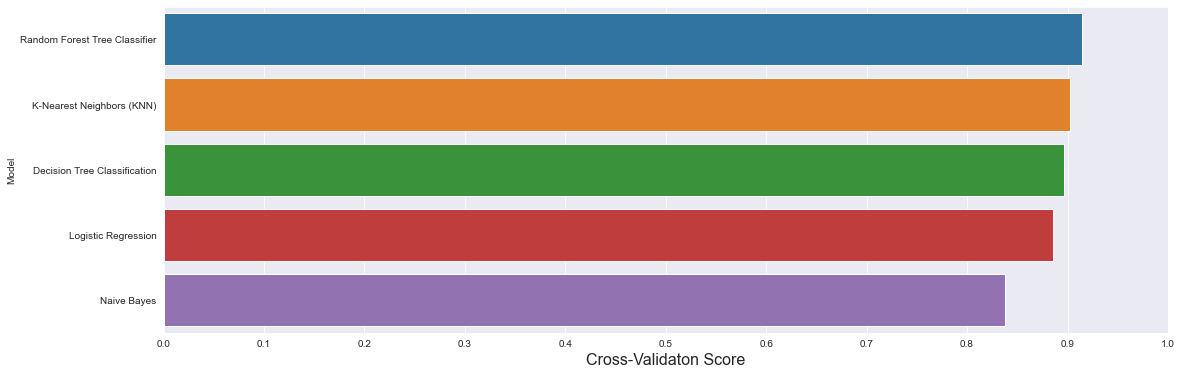

In [99]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

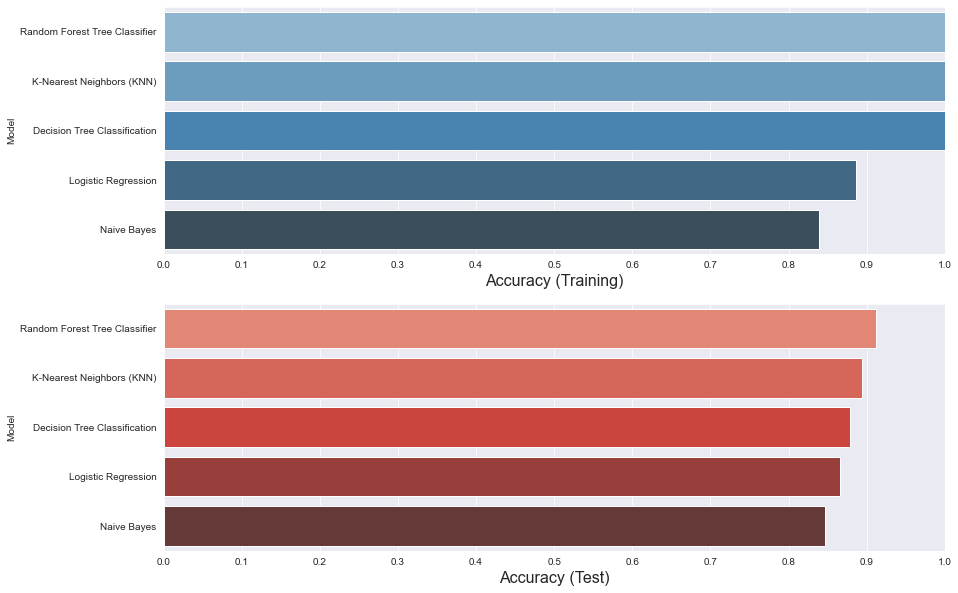

In [100]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Accuracy(training)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Accuracy (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Accuracy(test)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Accuracy (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

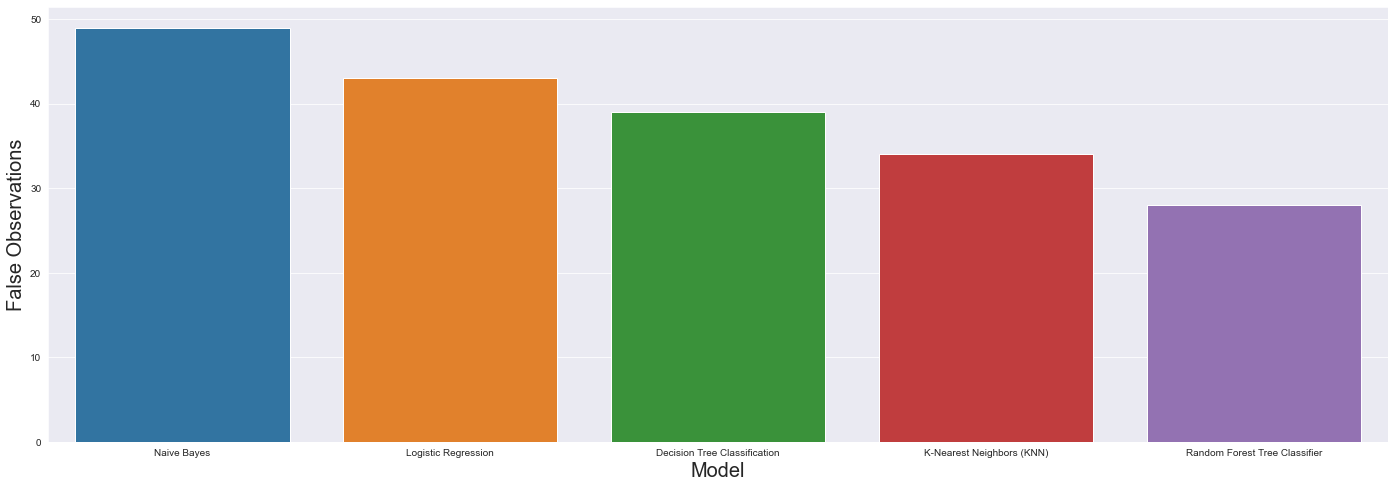

In [101]:
predict.sort_values(by=(['Accuracy(test)']), ascending=True, inplace=True)

f, axe = plt.subplots(1,1, figsize=(24,8))
sns.barplot(x = predict['Model'], y=predict['False Positive'] + predict['False Negative'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('False Observations', size=20)

plt.show()

# INFERENCE

In this project, we have used the 'winequality' dataset. We have built five models of Logistic regression, KNN, Naive Bayes, Decision Tree Classification, Random Forest Classifier. Then we have measured and visualized the performance of all the five models. From all of these models, Random forest classifier has got the accuracy of 91%. 